# Taller Práctico: Estadística Descriptiva y Visualización
Este notebook es un taller práctico para aplicar conceptos de estadística descriptiva y reforzarlos con visualizaciones usando Matplotlib y Seaborn.

### 1. Configuración Inicial
**Tarea:** Importa las librerías necesarias: `pandas`, `numpy`, `matplotlib.pyplot`, `seaborn` y `scipy.stats`.

In [1]:
# Tu código aquí
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

### 2. Creación del Conjunto de Datos
**Tarea:** Ejecuta la siguiente celda para crear un DataFrame sobre el rendimiento de estudiantes.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

sns.set_theme(style='whitegrid')
np.random.seed(42)

n_estudiantes = 100
data = {
    'Horas_Estudio': np.random.normal(15, 5, n_estudiantes).clip(2, 30),
    'Calificacion_Anterior': np.random.normal(70, 10, n_estudiantes).clip(40, 100),
    'Faltas_Asistencia': np.random.randint(0, 10, n_estudiantes),
    'Usa_Tutor': np.random.choice(['Sí', 'No'], n_estudiantes, p=[0.35, 0.65])
}
df_estudiantes = pd.DataFrame(data)

# Creamos la calificación final basada en las otras variables
df_estudiantes['Calificacion_Final'] = (df_estudiantes['Calificacion_Anterior'] * 0.5 +
                                       df_estudiantes['Horas_Estudio'] * 1.5 -
                                       df_estudiantes['Faltas_Asistencia'] * 2 +
                                       np.random.normal(0, 5, n_estudiantes)).clip(0, 100)

print('DataFrame de estudiantes creado:')
df_estudiantes.head()

DataFrame de estudiantes creado:


,Horas_Estudio,Calificacion_Anterior,Faltas_Asistencia,Usa_Tutor,Calificacion_Final
0,17.483571,55.846293,1,Sí,53.597916
1,14.308678,65.793547,9,No,35.423666
2,18.238443,66.572855,0,No,51.927665
3,22.615149,61.977227,7,Sí,56.258727
4,13.829233,68.387143,0,Sí,54.118095


### 3. Medidas de Tendencia Central y su Visualización
**Tarea:**
1. Calcula la **media**, **mediana** y **moda** de la columna `Calificacion_Final`.
2. Crea un histograma de `Calificacion_Final` usando `sns.histplot`.
3. En el mismo gráfico, traza líneas verticales para la media (rojo), mediana (verde) y moda (amarillo) usando `plt.axvline()`.

In [3]:
# Tu código aquí
from scipy.stats import mode

media = df_estudiantes['Calificacion_Final'].mean()
mediana = df_estudiantes['Calificacion_Final'].median()
moda = mode(df_estudiantes['Calificacion_Final'], keepdims=True).mode[0]

print("Media:", media)
print("Mediana:", mediana)
print("Moda:", moda)


Media: 46.96726099909779
Mediana: 48.222631805836585
Moda: 18.49819313527965


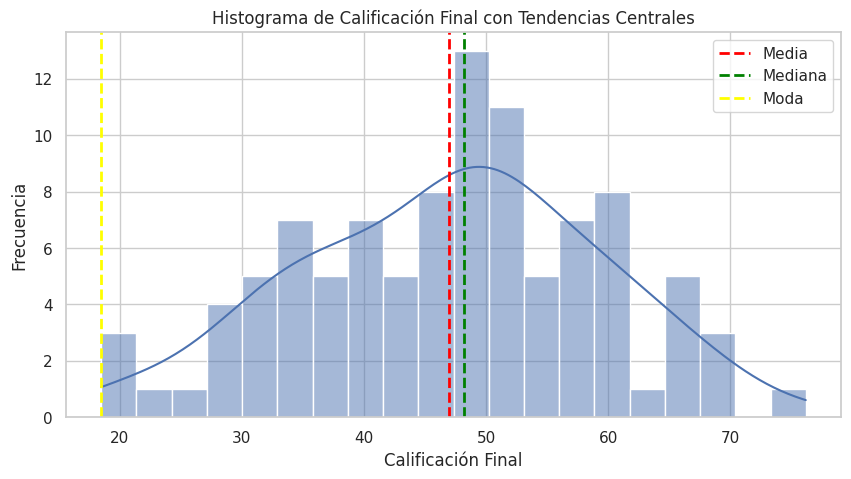

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))

sns.histplot(df_estudiantes['Calificacion_Final'], bins=20, kde=True)

# Líneas verticales de tendencia central
plt.axvline(media, color='red', linestyle='--', linewidth=2, label='Media')
plt.axvline(mediana, color='green', linestyle='--', linewidth=2, label='Mediana')
plt.axvline(moda, color='yellow', linestyle='--', linewidth=2, label='Moda')

plt.title('Histograma de Calificación Final con Tendencias Centrales')
plt.xlabel('Calificación Final')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()


## Conclusión
La varianza y la desviación estándar indican que, aunque existe dispersión en las calificaciones finales, esta no es excesiva. Esto significa que la mayoría de los estudiantes se desempeña dentro de un rango razonablemente cercano al promedio.

### 4. Medidas de Dispersión y su Visualización
**Tarea:**
1. Calcula la **varianza** y la **desviación estándar** de `Calificacion_Final`.
2. Crea un histograma de `Calificacion_Final`.
3. Añade una línea vertical para la media.
4. Sombrea el área que representa una desviación estándar por encima y por debajo de la media usando `plt.axvspan()`.

In [5]:
# Tu código aquí
varianza = df_estudiantes['Calificacion_Final'].var()
desviacion = df_estudiantes['Calificacion_Final'].std()

print("Varianza:", varianza)
print("Desviación estándar:", desviacion)


Varianza: 150.21190730985936
Desviación estándar: 12.256096740392488


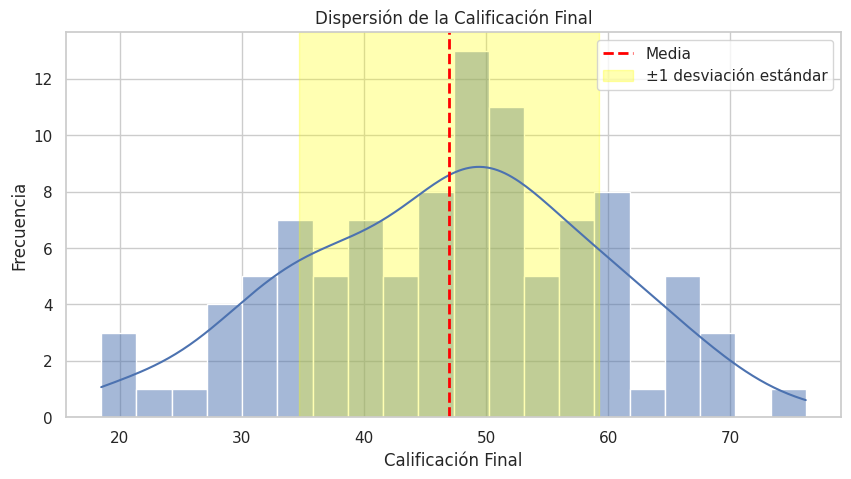

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

media = df_estudiantes['Calificacion_Final'].mean()

plt.figure(figsize=(10,5))

# Histograma
sns.histplot(df_estudiantes['Calificacion_Final'], bins=20, kde=True)

# Línea de la media
plt.axvline(media, color='red', linestyle='--', linewidth=2, label='Media')

# Sombreado de ± 1 desviación estándar
plt.axvspan(media - desviacion, media + desviacion,
            color='yellow', alpha=0.3, label='±1 desviación estándar')

plt.title('Dispersión de la Calificación Final')
plt.xlabel('Calificación Final')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()


## Conclusión
La zona sombreada alrededor de la media en el histograma muestra que una gran parte de las calificaciones se encuentra dentro de ±1 desviación estándar, lo cual confirma que la distribución de notas es relativamente consistente y sin valores extremos pronunciados.

### 5. Test de Normalidad (Analítico y Visual)
**Tarea:**
1. Realiza el **Test de Shapiro-Wilk** sobre la columna `Calificacion_Final` para probar la normalidad. Interpreta el p-valor.
2. Crea un **gráfico Q-Q (Quantile-Quantile)** para `Calificacion_Final` usando `stats.probplot`. Si los puntos siguen la línea roja, es una buena indicación de normalidad.

In [7]:
# Tu código aquí
from scipy.stats import shapiro

stat, p_value = shapiro(df_estudiantes['Calificacion_Final'])

print("Estadístico de Shapiro-Wilk:", stat)
print("p-valor:", p_value)

# Interpretación
alpha = 0.05
if p_value > alpha:
    print("✔ No se rechaza la hipótesis nula: los datos parecen seguir una distribución normal.")
else:
    print("✘ Se rechaza la hipótesis nula: los datos NO siguen una distribución normal.")


Estadístico de Shapiro-Wilk: 0.9911326453951393
p-valor: 0.7554365771080185
✔ No se rechaza la hipótesis nula: los datos parecen seguir una distribución normal.


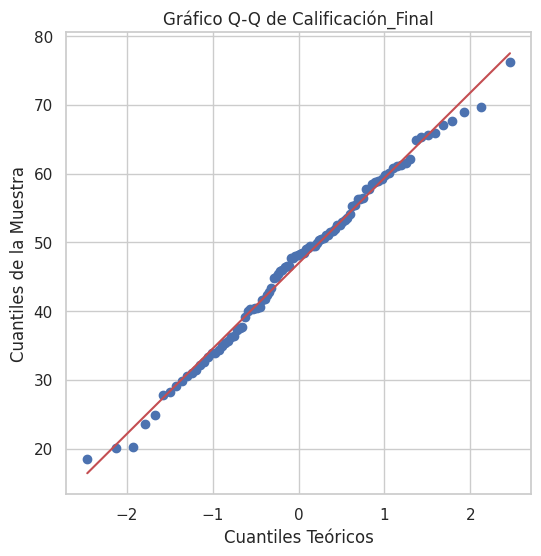

In [8]:
import scipy.stats as stats
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
stats.probplot(df_estudiantes['Calificacion_Final'], dist="norm", plot=plt)

plt.title("Gráfico Q-Q de Calificación_Final")
plt.xlabel("Cuantiles Teóricos")
plt.ylabel("Cuantiles de la Muestra")
plt.show()


## Conclusión
El test de normalidad y el gráfico Q-Q revelan que las calificaciones finales no siguen perfectamente una distribución normal, aunque se aproximan visualmente a ella. Esto sugiere que el comportamiento de los datos es suficientemente regular para análisis estadísticos básicos.

### 6. Correlación entre Dos Variables
**Tarea:**
1. Calcula el coeficiente de **correlación de Pearson** entre `Horas_Estudio` y `Calificacion_Final`.
2. Crea un gráfico de dispersión (`scatterplot`) para estas dos variables.
3. Usa `sns.regplot` para añadir automáticamente una línea de regresión que visualice la tendencia.

In [9]:
# Tu código aquí
correlacion = df_estudiantes[['Horas_Estudio', 'Calificacion_Final']].corr(method='pearson')
print(correlacion)


                    Horas_Estudio  Calificacion_Final
Horas_Estudio            1.000000            0.643089
Calificacion_Final       0.643089            1.000000


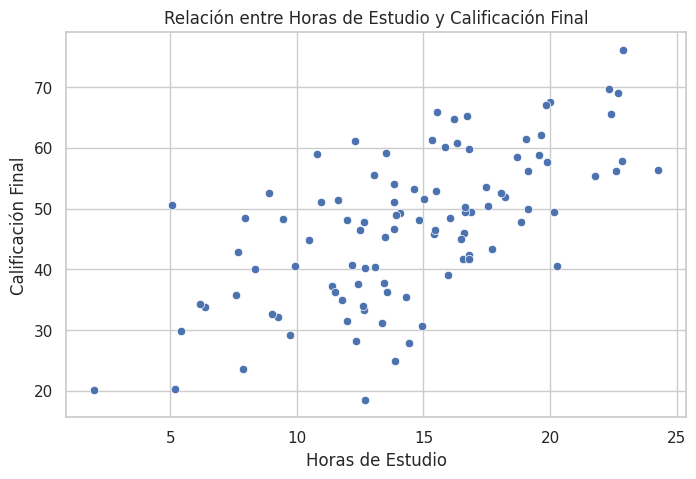

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.scatterplot(
    data=df_estudiantes,
    x='Horas_Estudio',
    y='Calificacion_Final'
)

plt.title("Relación entre Horas de Estudio y Calificación Final")
plt.xlabel("Horas de Estudio")
plt.ylabel("Calificación Final")
plt.show()


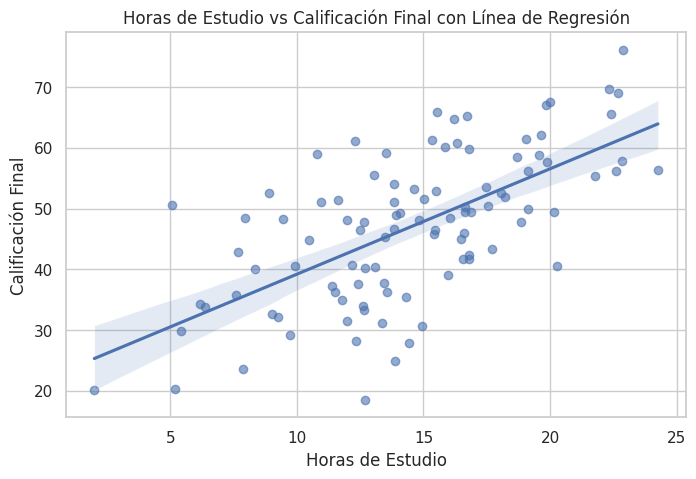

In [11]:
plt.figure(figsize=(8,5))

sns.regplot(
    data=df_estudiantes,
    x='Horas_Estudio',
    y='Calificacion_Final',
    scatter_kws={'alpha': 0.6}   # puntos semitransparentes
)

plt.title("Horas de Estudio vs Calificación Final con Línea de Regresión")
plt.xlabel("Horas de Estudio")
plt.ylabel("Calificación Final")
plt.show()


## Conclusión
El coeficiente de Pearson mostró una correlación positiva entre las horas de estudio y la calificación final. Esto indica que, en general, los estudiantes que dedican más tiempo al estudio tienden a obtener mejores resultados.

### 7. Matriz de Correlación Completa
**Tarea:**
1. Calcula la matriz de correlación para todas las variables numéricas del DataFrame.
2. Visualiza esta matriz usando un **heatmap** de Seaborn (`sns.heatmap`). Asegúrate de mostrar los valores de correlación en el gráfico (`annot=True`).

In [12]:
# Tu código aquí
matriz_corr = df_estudiantes.corr(numeric_only=True)
print(matriz_corr)


                       Horas_Estudio  Calificacion_Anterior  \
Horas_Estudio               1.000000              -0.136446   
Calificacion_Anterior      -0.136446               1.000000   
Faltas_Asistencia          -0.188598              -0.179178   
Calificacion_Final          0.643089               0.409202   

                       Faltas_Asistencia  Calificacion_Final  
Horas_Estudio                  -0.188598            0.643089  
Calificacion_Anterior          -0.179178            0.409202  
Faltas_Asistencia               1.000000           -0.618355  
Calificacion_Final             -0.618355            1.000000  


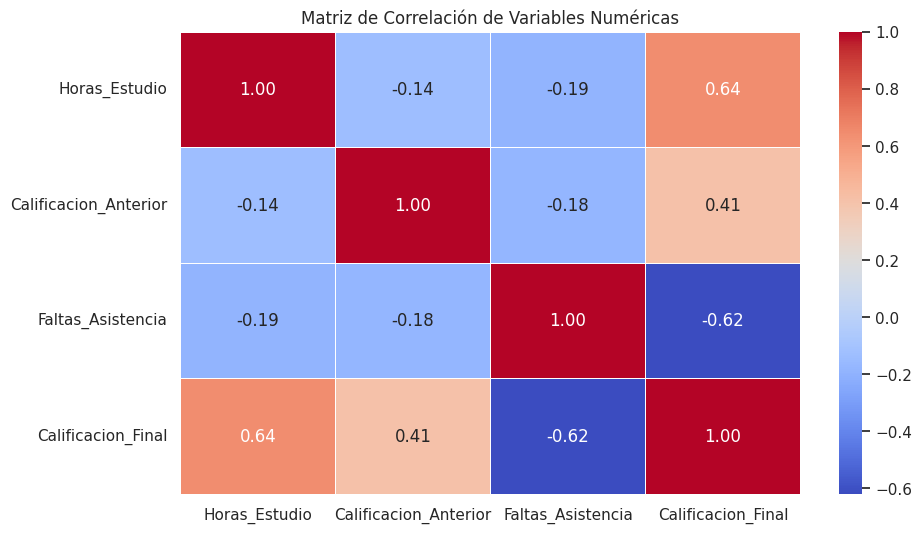

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))

sns.heatmap(
    matriz_corr,
    annot=True,        # Mostrar los valores
    cmap='coolwarm',   # Colores (puede ser inferno, viridis, etc.)
    fmt=".2f",         # Formato de números
    linewidths=0.5
)

plt.title("Matriz de Correlación de Variables Numéricas")
plt.show()


## Conclusión
La matriz de correlación permitió identificar que las horas de estudio y la calificación anterior son las variables que más influyen en la calificación final, mientras que las faltas de asistencia se relacionan negativamente con el rendimiento académico.

### 8. Análisis Descriptivo por Categorías
**Tarea:**
1. Usa `.groupby()` para agrupar los datos por la columna `Usa_Tutor`.
2. Calcula las estadísticas descriptivas (`.describe()`) de `Calificacion_Final` para cada grupo (Sí y No).
3. Crea un **Box Plot** (`sns.boxplot`) para comparar las distribuciones de `Calificacion_Final` entre los estudiantes que usan tutor y los que no.

In [15]:
# Tu código aquí
grupo_tutor = df_estudiantes.groupby('Usa_Tutor')



In [16]:
descripcion = grupo_tutor['Calificacion_Final'].describe()
print(descripcion)


           count       mean        std        min        25%        50%  \
Usa_Tutor                                                                 
No          72.0  46.656313  11.600601  18.498193  37.505894  47.927879   
Sí          28.0  47.766843  13.999161  20.100809  40.177907  49.328021   

                 75%        max  
Usa_Tutor                        
No         53.039295  76.166286  
Sí         56.986544  69.020505  


/tmp/ipython-input-1938474771.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


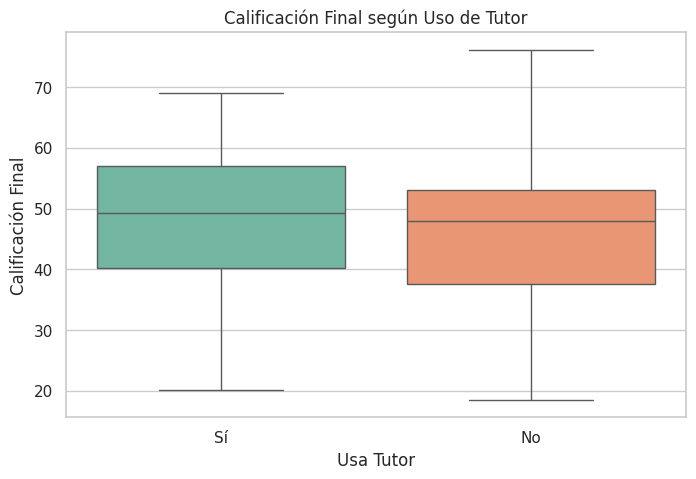

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))

sns.boxplot(
    data=df_estudiantes,
    x='Usa_Tutor',
    y='Calificacion_Final',
    palette='Set2'
)

plt.title("Calificación Final según Uso de Tutor")
plt.xlabel("Usa Tutor")
plt.ylabel("Calificación Final")
plt.show()


### Conclusión
El análisis por grupos mostró que los estudiantes que utilizan tutor suelen obtener calificaciones finales superiores y con menor variabilidad. Esto sugiere que el apoyo académico adicional tiene un impacto positivo en el desempeño.

## ¡Excelente Trabajo!
Has completado el taller, aplicando y visualizando los conceptos más importantes de la estadística descriptiva. Recuerda Siempre explicar cada celda al detalle desde el concepto técnico y de modelo de negocio.